In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')

In [4]:
data = df
X = data[['Age', 'Annual Income (k$)']]
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [5]:

df.shape

(200, 5)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
x = df.iloc[:,[3,4]].values 
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.cluster import KMeans
wcss = []
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [9]:
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", message=".*default value of `n_init` will change from 10 to 'auto' in 1.4.*")
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

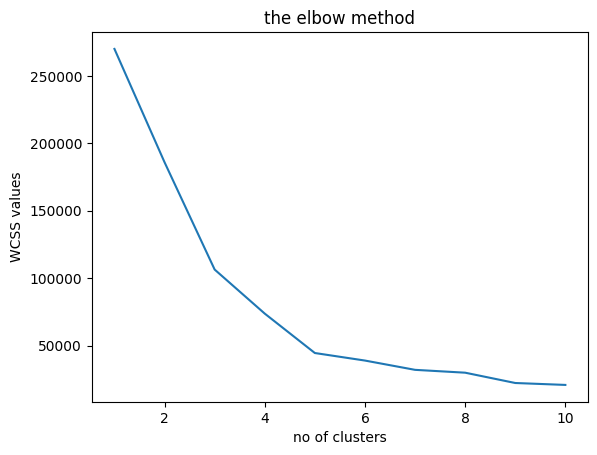

In [11]:
plt.plot(range(1,11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS values')
plt.show()

In [12]:

kmeansmodel = KMeans(n_clusters = 5, init= 'k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)
X = data[['Age', 'Annual Income (k$)']].values

<function matplotlib.pyplot.show(close=None, block=None)>

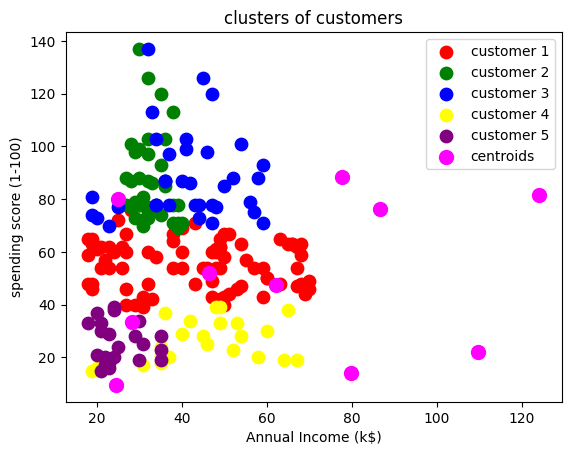

In [13]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s= 80, c = "red", label='customer 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s= 80, c = "green", label='customer 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s= 80, c = "blue", label='customer 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s= 80, c = "yellow", label='customer 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s= 80, c = "purple", label='customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'magenta', label = 'centroids')
plt.title('clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show